In [46]:
import tellurium as te
import pandas as pd
import sbml_sim_helper
import itertools
from scipy.optimize import differential_evolution as diff_evol

In [3]:
def sim_for_custom_x(rr, time, x_var, x_vals, custom_vars_opt=None):   
    df_list = []
    for val in x_vals:
        rr.resetToOrigin()
        for var, sval in custom_vars_opt.items():
            #print(f"Setting {var} to {sval}")
            setattr(rr, var, sval)
        print(f"Setting {x_var} to {val}")
        setattr(rr, x_var, val)
        results = rr.simulate(0, time, points=2)
        df_tmp = pd.DataFrame(results, columns=results.colnames)
        df_tmp = df_tmp.rename(columns={'time': x_var})
        df_tmp[x_var] = val
        df_list.append(df_tmp.tail(1))
    return pd.concat(df_list).reset_index(drop=True)

In [5]:
custom_vars = {'kh': 1e-6, 'kon': 1e-4, 'koff': 1e-3}

In [6]:
sim_time = 50000000000

In [7]:
x_var = 'Crosslinker'
x_vals = np.array([0.1, 10., 20., 50., 100.])

In [11]:
rr_c3 = sbml_sim_helper.load_model("c3", "asa_mono_only_simple_comp")

Loading c3_asa_mono_only_simple_comp model


In [9]:
rr_c3 = sbml_sim_helper.load_model_path("../output/model_example_mono_only_comp.xml")

Loading model at ../output/model_example_mono_only_comp.xml


In [1952]:
rr_c3 = te.loada("../output/model_example_mono_only_comp_antimony.txt")

In [1980]:
df_res = sim_for_custom_x(rr_c3, sim_time, x_var, x_vals, custom_vars)

Setting Crosslinker to 0.1
Setting Crosslinker to 10.0
Setting Crosslinker to 20.0
Setting Crosslinker to 50.0
Setting Crosslinker to 100.0


In [1981]:
df_res

,Crosslinker,[Crosslinker_c1],[CrosslinkerMonoHydrolized_c1],[CrosslinkerBiHydrolized_c1],[LYS_C3_65_c1],[LYS_C3_66_c1],[LYS_C3_73_c1],[LYS_C3_97_c1],[LYS_C3_100_c1],[LYS_C3_104_c1],...,[MonoHydro_C3_1546_c3],[MonoHydro_C3_1551_c3],[MonoHydro_C3_1570_c3],[MonoHydro_C3_1589_c3],[MonoHydro_C3_1595_c3],[MonoHydro_C3_1599_c3],[MonoHydro_C3_1600_c3],[MonoHydro_C3_1615_c3],[MonoHydro_C3_1624_c3],[MonoHydro_C3_1644_c3]
0,0.1,6.955642e-83,2.216976e-83,0.000137,0.00899,0.011058,0.00922,0.018957,0.018957,0.009612,...,0.98579,0.9904,0.990046,0.972133,0.990838,0.99064,0.989922,0.990858,0.990689,0.990726
1,10.0,6.955642e-83,2.216976e-83,0.000137,0.00899,0.011058,0.00922,0.018957,0.018957,0.009612,...,0.98579,0.9904,0.990046,0.972133,0.990838,0.99064,0.989922,0.990858,0.990689,0.990726
2,20.0,6.955642e-83,2.216976e-83,0.000137,0.00899,0.011058,0.00922,0.018957,0.018957,0.009612,...,0.98579,0.9904,0.990046,0.972133,0.990838,0.99064,0.989922,0.990858,0.990689,0.990726
3,50.0,6.955642e-83,2.216976e-83,0.000137,0.00899,0.011058,0.00922,0.018957,0.018957,0.009612,...,0.98579,0.9904,0.990046,0.972133,0.990838,0.99064,0.989922,0.990858,0.990689,0.990726
4,100.0,6.955642e-83,2.216976e-83,0.000137,0.00899,0.011058,0.00922,0.018957,0.018957,0.009612,...,0.98579,0.9904,0.990046,0.972133,0.990838,0.99064,0.989922,0.990858,0.990689,0.990726


In [10]:
results = rr_c3.simulate(0, sim_time, points=2)
df_res_t = pd.DataFrame(results, columns=results.colnames) 
df_res_t

,time,[Crosslinker_c1],[CrosslinkerMonoHydrolized_c1],[CrosslinkerBiHydrolized_c1],[LYS_1_c1],[LYS_2_c1],[LYS_3_c1],[LYS_4_c1],[LYS_5_c1],[LYS_6_c1],...,[MonoHydro_1_c3],[MonoHydro_2_c3],[MonoHydro_3_c3],[MonoHydro_4_c3],[MonoHydro_5_c3],[MonoHydro_6_c3],[MonoHydro_7_c3],[MonoHydro_8_c3],[MonoHydro_9_c3],[MonoHydro_10_c3]
0,0.000000e+00,1.000000e+01,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,5.000000e+10,-1.498527e-39,-8.148780e-39,0.242118,-1.614637e-19,0.242092,6.290514e-13,4.704328e-07,1.025701e-10,1.181699e-14,...,1.0,0.757908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999974


In [20]:
xl_str = 'Crosslinker'
conc_dict = {f'{xl_str}_c1': 50., f'{xl_str}_c2': 100., f'{xl_str}_c3': 200.}

In [21]:
rr_c3.resetToOrigin()
for k,v in conc_dict.items():
    setattr(rr_c3, k, v)
#rr_c3.kh = 1e-3

In [22]:
df_res_t = sim_for_fake_t(rr_c3, sim_time)
df_res_t

,time,[Crosslinker_c1],[CrosslinkerMonoHydrolized_c1],[CrosslinkerBiHydrolized_c1],[LYS_C3_65_c1],[LYS_C3_66_c1],[LYS_C3_73_c1],[LYS_C3_97_c1],[LYS_C3_100_c1],[LYS_C3_104_c1],...,[MonoHydro_C3_1546_c3],[MonoHydro_C3_1551_c3],[MonoHydro_C3_1570_c3],[MonoHydro_C3_1589_c3],[MonoHydro_C3_1595_c3],[MonoHydro_C3_1599_c3],[MonoHydro_C3_1600_c3],[MonoHydro_C3_1615_c3],[MonoHydro_C3_1624_c3],[MonoHydro_C3_1644_c3]
0,0.000000e+00,5.000000e+01,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.500000e+10,5.075100e-226,1.100307e-221,0.000013,0.311352,0.703676,0.399676,0.894825,0.894825,0.508855,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,5.000000e+10,5.075100e-226,1.100307e-221,0.000013,0.311352,0.703676,0.399676,0.894825,0.894825,0.508855,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
df_res_t[[c for c in df_res_t.columns if 'LYS_C3_65' in c]]

,[LYS_C3_65_c1],[LYS_C3_65_c2],[LYS_C3_65_c3]
0,1.000000,1.000000,1.000000e+00
1,0.311352,0.002874,1.073250e-11
2,0.311352,0.002874,1.073250e-11


In [24]:
df_res_t[[c for c in df_res_t.columns if 'c1' in c]]

,[Crosslinker_c1],[CrosslinkerMonoHydrolized_c1],[CrosslinkerBiHydrolized_c1],[LYS_C3_65_c1],[LYS_C3_66_c1],[LYS_C3_73_c1],[LYS_C3_97_c1],[LYS_C3_100_c1],[LYS_C3_104_c1],[LYS_C3_119_c1],...,[MonoHydro_C3_1546_c1],[MonoHydro_C3_1551_c1],[MonoHydro_C3_1570_c1],[MonoHydro_C3_1589_c1],[MonoHydro_C3_1595_c1],[MonoHydro_C3_1599_c1],[MonoHydro_C3_1600_c1],[MonoHydro_C3_1615_c1],[MonoHydro_C3_1624_c1],[MonoHydro_C3_1644_c1]
0,5.000000e+01,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.075100e-226,1.100307e-221,0.000013,0.311352,0.703676,0.399676,0.894825,0.894825,0.508855,0.986412,...,0.165843,0.494062,0.423962,0.066498,0.620843,0.556538,0.404066,0.628069,0.571028,0.582597
2,5.075100e-226,1.100307e-221,0.000013,0.311352,0.703676,0.399676,0.894825,0.894825,0.508855,0.986412,...,0.165843,0.494062,0.423962,0.066498,0.620843,0.556538,0.404066,0.628069,0.571028,0.582597


In [1690]:
df_res_t = sim_for_fake_t(rr_c3, sim_time)
df_res_t

,time,[Crosslinker_c1],[CrosslinkerMonoHydrolized_c1],[CrosslinkerBiHydrolized_c1],[LYS_1_c1],[LYS_2_c1],[LYS_3_c1],[LYS_4_c1],[LYS_5_c1],[LYS_6_c1],...,[MonoHydro_1_c3],[MonoHydro_2_c3],[MonoHydro_3_c3],[MonoHydro_4_c3],[MonoHydro_5_c3],[MonoHydro_6_c3],[MonoHydro_7_c3],[MonoHydro_8_c3],[MonoHydro_9_c3],[MonoHydro_10_c3]
0,0.0,1.000000e+00,0.000000e+00,0.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2500000.0,5.081874e-97,2.137409e-97,0.00001,0.80959,0.994033,0.888203,0.940374,0.907506,0.873419,...,1.0,0.757908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999974
2,5000000.0,5.081874e-97,2.137409e-97,0.00001,0.80959,0.994033,0.888203,0.940374,0.907506,0.873419,...,1.0,0.757908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999974


In [1403]:
#rr_c3.reset()
#res_t = rr_c3.simulate(0, sim_time, points=5)
#df_res_t = pd.DataFrame(res_t, columns=res_t.colnames)
#df_res_t

In [25]:
df_res_t.to_csv('tmp_eq.csv', index=False)

In [26]:
stochastic_simulation_model = te.StochasticSimulationModel(model=rr_c3.getAntimony(),#,"../output/model_c3_antimony_asa_mono_only.txt",
                seed=1234, # not used
                variable_step_size = False,
                from_time=0,
                to_time=sim_time,
                step_points=3)
stochastic_simulation_model.integrator = "gillespie"

In [27]:
#bounds = {"klys_C3_100": (1e-4, 1e-2), "klys_C3_104": (1e-3, 1e-1), "klys_C3_119": (1e-5, 1e-3), "klys_C3_1036": (1e-3, 1e-1)}#{"kh":(1e-8,1e-5),"kon":(1e-5,1e-1),"koff":(1e-5,1e-1)} {"klys_C3_100": (1e-2, 1.0), "klys_C3_104": (1e-2, 1.0), "klys_C3_119": (1e-2, 1.0)}

In [28]:
vars_klys = sbml_sim_helper.get_rr_const_dict(rr_c3, 'klys')

In [29]:
vars_kon_xl = sbml_sim_helper.get_rr_const_dict(rr_c3, 'kon_xl')

In [30]:
vars_extra = sbml_sim_helper.get_rr_const_dict(rr_c3, 'kh')

In [31]:
vars_combined = {**vars_klys, **vars_kon_xl}

In [32]:
#vars_combined = {**vars_combined, **vars_extra}

In [33]:
#pd.options.display.float_format = '{:.2e}'.format

In [34]:
df_param = pd.DataFrame.from_dict(vars_combined, orient='index').reset_index().rename(columns={'index': 'param', 0: 'val_exp'})
df_param

,param,val_exp
0,klys_C3_100,0.005000
1,klys_C3_1001,0.051519
2,klys_C3_1036,0.020178
3,klys_C3_104,0.040746
4,klys_C3_1041,0.027524
...,...,...
108,klys_C3_927,0.044174
109,klys_C3_930,0.019199
110,klys_C3_940,0.028503
111,klys_C3_959,0.062782


In [38]:
bounds = {v: (1e-5,1e0) for v in vars_klys.keys()}#{"kh":(1e-8,1e-5),"kon":(1e-5,1e-1),"koff":(1e-5,1e-1)} {"klys_C3_100": (1e-2, 1.0), "klys_C3_104": (1e-2, 1.0), "klys_C3_119": (1e-2, 1.0)}

In [39]:
#bounds['kh'] = (1e-7, 1e-4)

In [40]:
parameter_est = ParameterEstimation(stochastic_simulation_model,bounds)

In [41]:
parameter_est.setDataFromFile('tmp_eq.csv', headers=True)

In [42]:
parameter_est.setCustomAttr(conc_dict)

In [43]:
res1 = []
for n in range(5):
    res1.append(parameter_est.run(params={'strategy': 'best2bin', 'disp': True, 'maxiter': 1}))

differential_evolution step 1: f(x)= 4.91844
differential_evolution step 1: f(x)= 5.05248
differential_evolution step 1: f(x)= 5.02963
differential_evolution step 1: f(x)= 4.87263
differential_evolution step 1: f(x)= 4.98122


In [44]:
res2 = []
for n in range(5):
    res2.append(parameter_est.run(params={'strategy': 'best2bin', 'disp': True, 'maxiter': 1}))

differential_evolution step 1: f(x)= 4.65683
differential_evolution step 1: f(x)= 4.68452
differential_evolution step 1: f(x)= 4.74403
differential_evolution step 1: f(x)= 4.87612
differential_evolution step 1: f(x)= 4.9223


In [45]:
res3 = []
for n in range(5):
    res3.append(parameter_est.run(params={'strategy': 'best2bin', 'disp': True, 'maxiter': 1}))

differential_evolution step 1: f(x)= 4.67138
differential_evolution step 1: f(x)= 4.82564
differential_evolution step 1: f(x)= 4.72789
differential_evolution step 1: f(x)= 4.91924
differential_evolution step 1: f(x)= 4.80288


In [56]:
res

0.24345918784557158

In [67]:
res_dict = {}
for j,res_list in enumerate([res2, res3]):
    for i,res in enumerate(res_list):
        res_dict[(j+1)*(i+1)] = {v: res[n] for n,v in enumerate(bounds.keys())}

In [70]:
#df_res = pd.DataFrame.from_dict(res_dict, orient='index').reset_index().rename(columns={'index': 'param', 0: 'val_fit'})
#df_res

In [72]:
df_res = pd.DataFrame.from_dict(res_dict, orient='index').reset_index()
df_res

,index,klys_C3_100,klys_C3_1001,klys_C3_1036,klys_C3_104,klys_C3_1041,klys_C3_1050,klys_C3_1051,klys_C3_1071,klys_C3_1084,...,klys_C3_861,klys_C3_879,klys_C3_891,klys_C3_904,klys_C3_913,klys_C3_927,klys_C3_930,klys_C3_940,klys_C3_959,klys_C3_97
0,1,0.719740,0.850436,0.745445,0.532200,0.289442,0.449765,0.619445,0.528966,0.020082,...,0.931217,0.098243,0.429486,0.068658,0.684287,0.297726,0.341512,0.315247,0.848779,0.047801
1,2,0.398936,0.302360,0.312738,0.375660,0.608198,0.523460,0.383037,0.396453,0.054853,...,0.673756,0.479711,0.706988,0.783546,0.543805,0.716876,0.853340,0.096956,0.366502,0.842870
2,3,0.690881,0.467907,0.212329,0.453752,0.334043,0.627796,0.862187,0.765145,0.052196,...,0.360973,0.592492,0.118948,0.671606,0.435207,0.095505,0.946149,0.200191,0.191794,0.144582
3,4,0.060785,0.296577,0.549227,0.536007,0.832729,0.881918,0.498303,0.070303,0.847631,...,0.650257,0.745564,0.663438,0.816140,0.086207,0.181793,0.759543,0.278167,0.837919,0.868135
4,5,0.380332,0.428233,0.592659,0.273435,0.535640,0.301350,0.992150,0.516637,0.100986,...,0.355716,0.093719,0.352105,0.372452,0.110285,0.387295,0.715723,0.605167,0.844407,0.361948
5,6,0.156779,0.579124,0.571867,0.414146,0.185196,0.717369,0.272093,0.524655,0.981399,...,0.844093,0.666216,0.186891,0.234833,0.940676,0.493323,0.447484,0.890194,0.232818,0.347608
6,8,0.803433,0.034016,0.297717,0.321723,0.250577,0.323831,0.360765,0.992677,0.046311,...,0.613055,0.357174,0.138802,0.468384,0.899438,0.328397,0.429213,0.932482,0.647409,0.434428
7,10,0.243459,0.867416,0.608435,0.877572,0.580970,0.373628,0.141796,0.158027,0.354459,...,0.075103,0.694401,0.348112,0.349034,0.621219,0.904419,0.527649,0.961871,0.784564,0.063991


In [141]:
df_res_melt = pd.melt(df_res, id_vars='index', var_name='param', value_name='val_fit').drop('index', axis=1)
df_res_melt

,param,val_fit
0,klys_C3_100,0.719740
1,klys_C3_100,0.398936
2,klys_C3_100,0.690881
3,klys_C3_100,0.060785
4,klys_C3_100,0.380332
...,...,...
899,klys_C3_97,0.868135
900,klys_C3_97,0.361948
901,klys_C3_97,0.347608
902,klys_C3_97,0.434428


In [142]:
df_res_melt_mean = df_res_melt.groupby('param').agg(['mean', 'std']).reset_index()
df_res_melt_mean

param   val_fit          
                       mean       std
0     klys_C3_100  0.431793  0.277909
1    klys_C3_1001  0.478259  0.283862
2    klys_C3_1036  0.486302  0.187241
3     klys_C3_104  0.473062  0.187911
4    klys_C3_1041  0.452099  0.222028
..            ...       ...       ...
108   klys_C3_927  0.425667  0.271074
109   klys_C3_930  0.627577  0.220791
110   klys_C3_940  0.535035  0.356477
111   klys_C3_959  0.594274  0.285421
112    klys_C3_97  0.388920  0.321128

[113 rows x 3 columns]

In [143]:
print([col for col in df_res_melt_mean.columns])

[('param', ''), ('val_fit', 'mean'), ('val_fit', 'std')]


In [144]:
df_res_melt_mean.columns = ['_'.join(col) if col[1] else col[0] for col in df_res_melt_mean.columns ]
df_res_melt_mean

,param,val_fit_mean,val_fit_std
0,klys_C3_100,0.431793,0.277909
1,klys_C3_1001,0.478259,0.283862
2,klys_C3_1036,0.486302,0.187241
3,klys_C3_104,0.473062,0.187911
4,klys_C3_1041,0.452099,0.222028
...,...,...,...
108,klys_C3_927,0.425667,0.271074
109,klys_C3_930,0.627577,0.220791
110,klys_C3_940,0.535035,0.356477
111,klys_C3_959,0.594274,0.285421


In [159]:
df_merge = pd.merge(df_param, df_res_melt_mean, on='param')

In [160]:
#df_merge['diff_abs'] = abs(df_merge['val_exp'] - df_merge['val_fit'])
df_merge['error_rel'] = df_merge['val_exp']/df_merge['val_fit_mean']
df_merge['error_rel'] = df_merge['error_rel'].transform(lambda x: x**-1 if x < 1 else x)

### 10 Lys, two concentrations in compartments, max 10 iterations

In [161]:
df_merge['error_rel'].mean()

25.109056664866504

In [162]:
df_merge.sort_values("val_fit_std")

,param,val_exp,val_fit_mean,val_fit_std,error_rel
69,klys_C3_365,0.000100,0.048155,0.050732,481.550242
50,klys_C3_1589,0.003038,0.124600,0.118064,41.010620
30,klys_C3_1364,0.052009,0.675022,0.133388,12.978999
15,klys_C3_119,0.000590,0.126042,0.141049,213.736210
85,klys_C3_622,0.082371,0.716826,0.141954,8.702455
...,...,...,...,...,...
80,klys_C3_600,0.032910,0.515155,0.360633,15.653299
10,klys_C3_1111,0.003528,0.429581,0.361692,121.765212
75,klys_C3_497,0.005976,0.420694,0.379847,70.391682
20,klys_C3_1225,0.028993,0.544491,0.386416,18.780298


<AxesSubplot:xlabel='val_fit_std', ylabel='error_rel'>

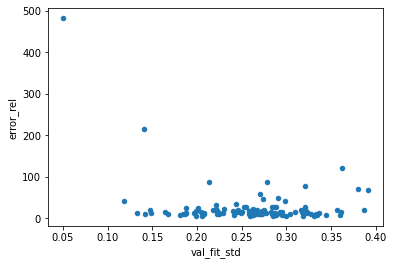

In [153]:
df_merge.plot(x="val_fit_std", y='error_rel', kind='scatter')

<AxesSubplot:xlabel='val_fit_mean', ylabel='val_exp'>

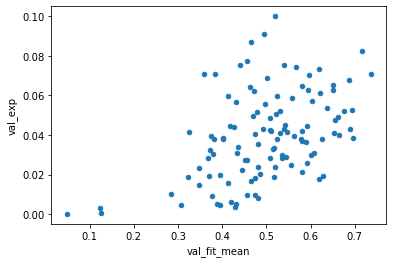

In [154]:
df_merge.plot(x="val_fit_mean", y='val_exp', kind='scatter')

In [163]:
df_merge.corr()

,val_exp,val_fit_mean,val_fit_std,error_rel
val_exp,1.000000,0.460836,0.098374,-0.453102
val_fit_mean,0.460836,1.000000,0.199831,-0.497494
val_fit_std,0.098374,0.199831,1.000000,-0.282645
error_rel,-0.453102,-0.497494,-0.282645,1.000000


### 10 Lys, three concentrations in compartments, max 10 iterations

In [2010]:
df_merge['error_rel'].mean()

21.419767179031968

In [2008]:
df_merge.sort_values("error_rel").head(15)

,param,val_exp,val_fit,error_rel
82,klys_C3_608,0.077474,0.073403,1.055460
66,klys_C3_322,0.019688,0.017952,1.096685
0,klys_C3_100,0.005000,0.006441,1.288222
7,klys_C3_1071,0.091185,0.122233,1.340486
84,klys_C3_615,0.037807,0.051821,1.370660
25,klys_C3_1337,0.049071,0.079151,1.613002
21,klys_C3_1244,0.065231,0.153496,2.353121
65,klys_C3_305,0.067679,0.159838,2.361691
8,klys_C3_1084,0.004507,0.010734,2.381356
36,klys_C3_1436,0.040256,0.097320,2.417531


In [1172]:
df_merge['error_rel'].mean()

1.9850786942561904

In [1173]:
df_merge

,param,val_exp,val_fit,error_rel
0,klys_1,0.032026,0.046693,1.457967
1,klys_10,0.226135,0.999989,4.422085
2,klys_2,0.065392,0.107608,1.645578
3,klys_3,0.133549,0.298784,2.237263
4,klys_4,0.091607,0.167932,1.833183
5,klys_5,0.046965,0.072144,1.536138
6,klys_6,0.002506,0.002553,1.018701
7,klys_7,0.137557,0.315052,2.290335
8,klys_8,0.028689,0.041379,1.442330
9,klys_9,0.107465,0.211406,1.967206


### 10 Lys, three concentrations in compartments, max 100 iterations

In [1158]:
df_merge['error_rel'].mean()

1.9860164832941152

In [1159]:
df_merge

,param,val_exp,val_fit,error_rel
0,klys_1,0.032026,0.046714,1.458625
1,klys_10,0.226135,0.999906,4.421721
2,klys_2,0.065392,0.107696,1.646919
3,klys_3,0.133549,0.299358,2.241557
4,klys_4,0.091607,0.167997,1.833894
5,klys_5,0.046965,0.072192,1.537165
6,klys_6,0.002506,0.002553,1.018712
7,klys_7,0.137557,0.314956,2.289639
8,klys_8,0.028689,0.041388,1.442675
9,klys_9,0.107465,0.211627,1.969257


### 10 Lys, three concentrations in compartments, max 1000 iterations

In [1107]:
df_merge['error_rel'].mean()

1.2938554073660655

In [1108]:
df_merge

,param,val_exp,val_fit,error_rel
0,klys_1,0.032026,0.038146,1.191092
1,klys_10,0.226135,0.373478,1.651571
2,klys_2,0.065392,0.081772,1.250475
3,klys_3,0.133549,0.186080,1.393344
4,klys_4,0.091607,0.119241,1.301661
5,klys_5,0.046965,0.057155,1.216968
6,klys_6,0.002506,0.002530,1.009562
7,klys_7,0.137557,0.192995,1.403020
8,klys_8,0.028689,0.034012,1.185557
9,klys_9,0.107465,0.143499,1.335304


### 10 Lys, one concentration, max 1000 iterations

In [1129]:
df_merge['error_rel'].mean()

8.028660861504815

In [1130]:
df_merge

,param,val_exp,val_fit,error_rel
0,klys_1,0.032026,0.632135,19.738162
1,klys_10,0.226135,0.749604,3.314852
2,klys_2,0.065392,0.231401,3.538645
3,klys_3,0.133549,0.112609,1.185951
4,klys_4,0.091607,0.070547,1.298527
5,klys_5,0.046965,0.513272,10.928890
6,klys_6,0.002506,0.002599,1.036804
7,klys_7,0.137557,0.613221,4.457940
8,klys_8,0.028689,0.872966,30.428959
9,klys_9,0.107465,0.468320,4.357878
